In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
os.chdir('./code/')

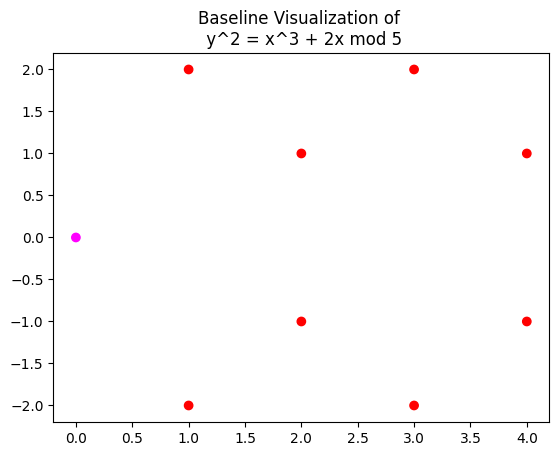

In [5]:
from ecfppoints import *
# Make ecfp pic

sqrts5 = get_sqrt_dic(5)

pts_test5 = np.array(get_points_wtwst((2,0),sqrts5))
plt.figure()
plt.title('Baseline Visualization of \n y^2 = x^3 + 2x mod 5')
plt.scatter(x=pts_test5[::,0],y = pts_test5[::,1],c=[[int(z<=0),0,int(z>=0)] for z in pts_test5[::,2]])
plt.show()

In [6]:
from lattices import *

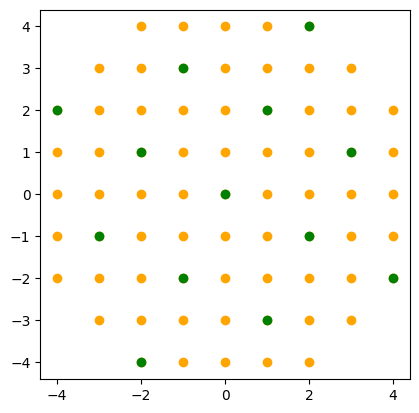

In [7]:
square_lattice_pts = lattice_pts(np.array([1,0]),np.array([0,1]),5)
square_lattice_sym = lattice_pts(np.array([-2,1]),np.array([-1,-2]),5)

plt.figure()

plt.scatter(x=square_lattice_pts[::,0],
            y = square_lattice_pts[::,1],
            c = 'orange')
plt.scatter(x=square_lattice_sym[::,0],
            y = square_lattice_sym[::,1],
            c = 'green')
plt.gca().set_aspect('equal')

plt.show()

In the general case, one should expect multiple lattices with any given symmetry. (Depending on how various conjectures work out, it is possible that there are only a finite number of ecfp's overall that have exactly one associated lattice, or there may be infinitely such curves.)

In fact, if we had chosen $y^2 = x^3 \pm x$ instead of $y^2 = x^3 + 2x$ (and kept $p = 5$), then the roots would be $\pm 1 \pm 2i$. There are two lattices with this as a symmetry: the square lattice and the lattice generated by $\tau = 2i$.

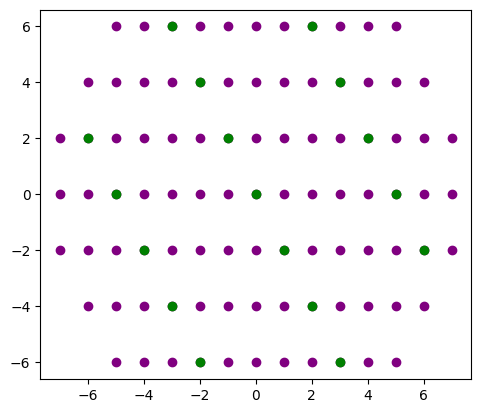

In [8]:
tau2i_lattice_pts = lattice_pts(np.array([1,0]),np.array([0,2]),8)
tau2i_lattice_sym2 = lattice_pts(np.array([-1,2]),np.array([-4,-2]),8)

plt.figure()

plt.scatter(x=tau2i_lattice_pts[::,0],
            y = tau2i_lattice_pts[::,1],
            c = 'purple')
plt.scatter(x=tau2i_lattice_sym2[::,0],
            y = tau2i_lattice_sym2[::,1],
            c = 'green')
plt.gca().set_aspect('equal')

plt.show()

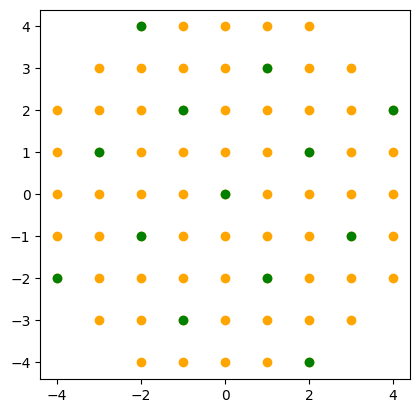

In [9]:
square_lattice_sym2 = lattice_pts(np.array([-1,2]),np.array([-2,-1]),5)

plt.figure()

plt.scatter(x=square_lattice_pts[::,0],
            y = square_lattice_pts[::,1],
            c = 'orange')
plt.scatter(x=square_lattice_sym2[::,0],
            y = square_lattice_sym2[::,1],
            c = 'green')
plt.gca().set_aspect('equal')

plt.show()

In [9]:
ecex = EllCurveCPVis(-2,5)

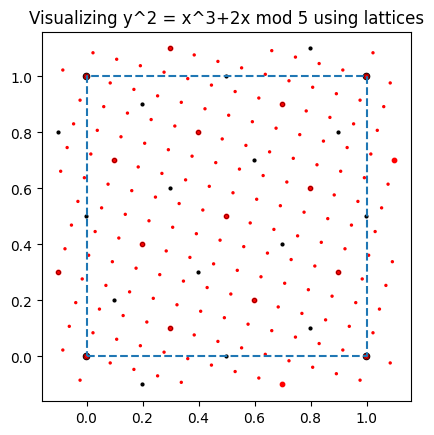

In [10]:
ecex.make_plots(k=0,sizes = [20,10,4,2],ep=0.1)
plt.title('Visualizing y^2 = x^3+2x mod 5 using lattices')
plt.show()

Once we have the data needed to make these pictures, we can obtain additional pictures by passing these points through the complex exponential. 

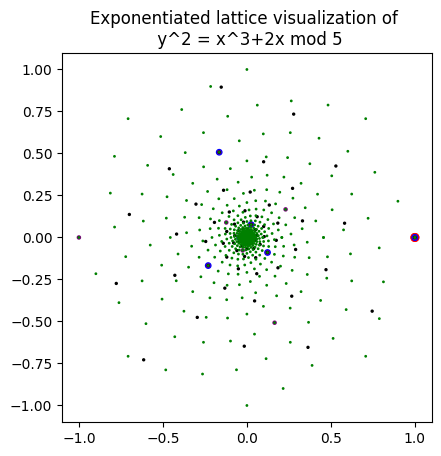

In [12]:
ecex.make_plots_exp(k=0,sizes = [30,15,5,2,1],colors=['red','blue','purple','black','green'],ep=0.001)
plt.title('Exponentiated lattice visualization of \n y^2 = x^3+2x mod 5')
plt.show()

### $\tau = i$ vs $\tau = 2i$

There are two lattice with $-1+2i$ as a symmetry. To tell them apart, we will look beyond $p = 5$ for additional primes where those lattices come up.

To specifically tell these two lattices apart, we need to find primes $p$ with the following property:
* There is a lattice point, whose $y$ value is as small as possible among positive values, which has length $p$.
* Geometrically, these are easy to picture:

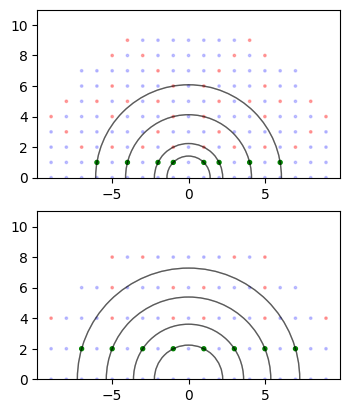

In [26]:
lattice_primesX([np.array([0,1]),np.array([0,2])],[[1],[1]],10)

By collecting enough data from enough primes, we deduce that the square lattice has $j$-invariant equal to 1728, and the $\tau = 2i$ lattice has $j$-invariant equal to $66^3$.

## Back to 5

Up to a change of variable, there are two elliptic curves mod 5 that have 8 points.

In [29]:
def trace_mod5(f:int,g:int):
    qrs = [pow(x**3+f*x+g,2,5) for x in range(5)]
    return sum([s-(s//4)*5 for s in qrs])

In [36]:
cardinalities_mod_5 = {(f,g):6-trace_mod5(f,g) for f in range(5) for g in range(5)
                       if (2*g*g)%5 != (4*(f**3))%5}
coefs_card8_mod5 = [fg for fg in cardinalities_mod_5 if cardinalities_mod_5[fg]==8]

The first curve is $y^2 = x^3 + x$. This has $j$-invariant equal to 3 mod 5.

The second curve is $y^2 = x^3 + x + 2$, which has $j$-invariant equal to 1 mod 5.

Since $1728 \equiv 1 \pmod 5$ and $66^3 = 1 \pmod 5$, it follows that 

## Question: Given a lattice, are there enough primes?
Can we always obtain enough data to determine the $j$-invariant?

In [35]:
coefs

[(1, 0), (1, 2), (1, 3)]